## About the project

In this project we will be predicting sales of a big mart that may have several branches across the country.

what is the purpose of this project you ase?

well from this project we can find which product is selling better in which branch, which is not and a lots of more  important info.

This is a Regression problem

This Project needs a lots of preprocessing. So it is a very important project.

So let get started.

Pew pew 🔫

## Workflow

**Data** => **Data preprocessing** => **Data Analysis** => **Test Train Split** => **XGBoost Regressor** => **Evaluation** => **prediction**

## About the data set

Let's take a look at the data set we will be working with -

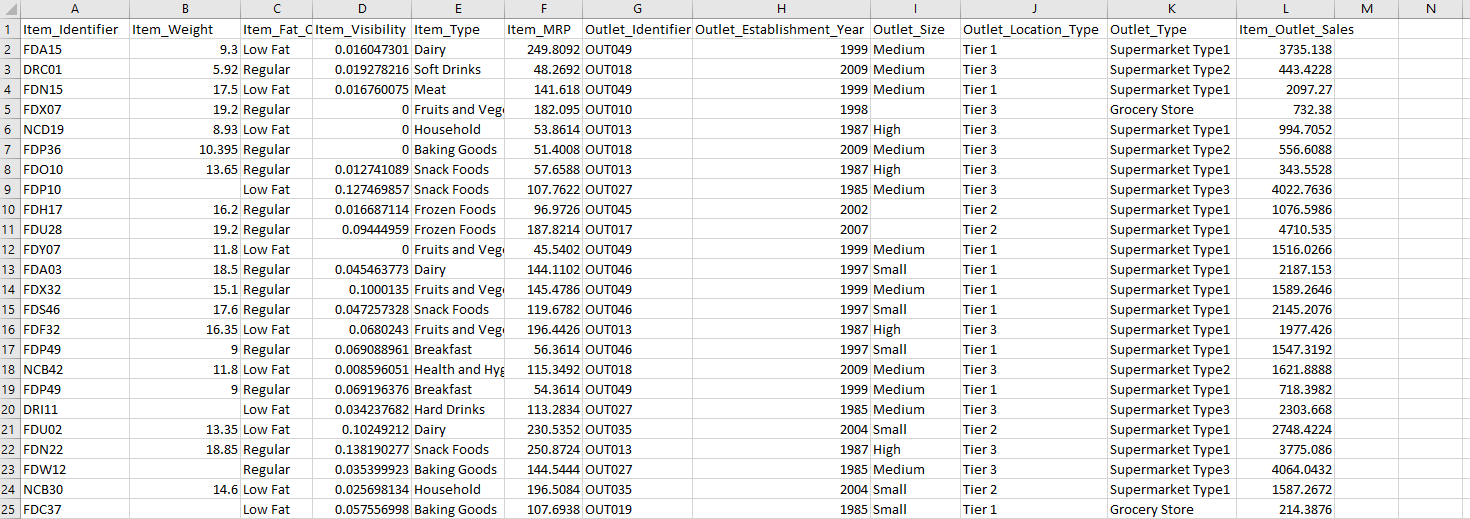

Categorical Features -

1. Item_identifier -- primary key -- Example - FDA represents some food, DRC represents some drink etc
2. Item_Fat_control
3. item_Type
4. outlet_Identifier -- Foreign Key
5. Outlet_size
6. Outlet_Location_Type
7. Outlet_type


Other Features are Numarical Features.

Target -
* Item_outlet_sales

## Code

### Data collection

In [126]:
# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [127]:
data = pd.read_csv("/content/big_mart_data.csv")

In [128]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [129]:
data.shape

(8523, 12)

In [130]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### **Handeling the missing values**

Mean = Average value -- For handeling the missing vlaues in the numerical columns

Mode = Most important values -- for handling the missing values in the categorical columns

In [131]:
# mean value of item_weight colmn
mean_value = data['Item_Weight'].mean()
print(mean_value)

12.857645184135976


In [132]:
#filling the missing values with the mean value
data['Item_Weight'].fillna(mean_value, inplace=True)
# if we give inplace = true it will replace the missing values in the original dataset
# if set to false it only applies for the "Data" variable

In [133]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [134]:
# Replacing the missing values in the Outlet size with mod
mode_value = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_value)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


Now what we are getting her is -

How the outlet size and outlet type is connected.

as we can see, most of the Grocery stores are small, most of the super market is medium size.

In [135]:
missing_values = data['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


True = value missing

False = Value not missing

In [136]:
data.loc[missing_values, 'Outlet_Size'] = data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_value[x])

In [137]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### **Data Analysis For numarical features**

In [138]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [139]:
sns.set()

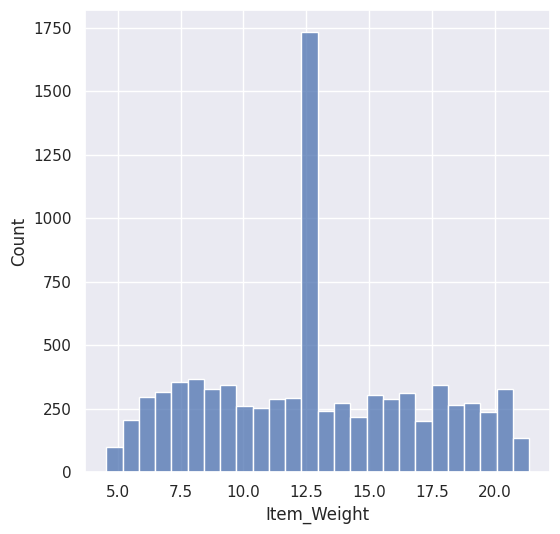

In [140]:
# Item weight distribution
plt.figure(figsize=(6,6))
sns.histplot(data['Item_Weight'])
plt.show()

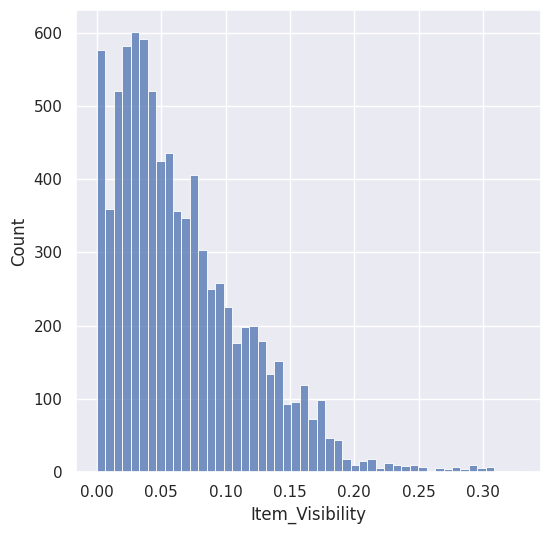

In [141]:
# Item visibility distributon
plt.figure(figsize=(6,6))
sns.histplot(data['Item_Visibility'])
plt.show()

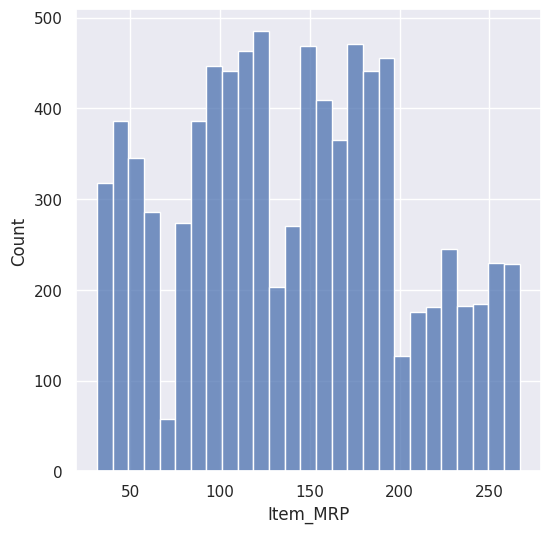

In [142]:
# Item_mrp distribution
plt.figure(figsize=(6,6))
sns.histplot(data['Item_MRP'])
plt.show()

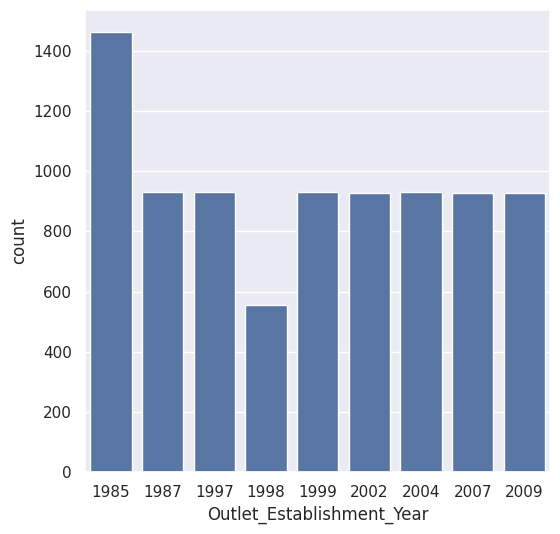

In [143]:
# Outlet_establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Establishment_Year", data = data)
plt.show()

### **Data Analysis For categorical features**

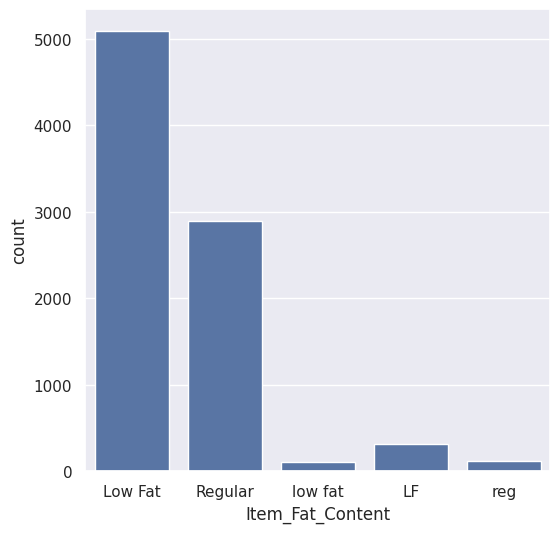

In [144]:
# item_fat_content distribution
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content", data = data)
plt.show()

Here,
Low Fat == low fat == LF

we will need to deal with this later. this is why data analysis is important.

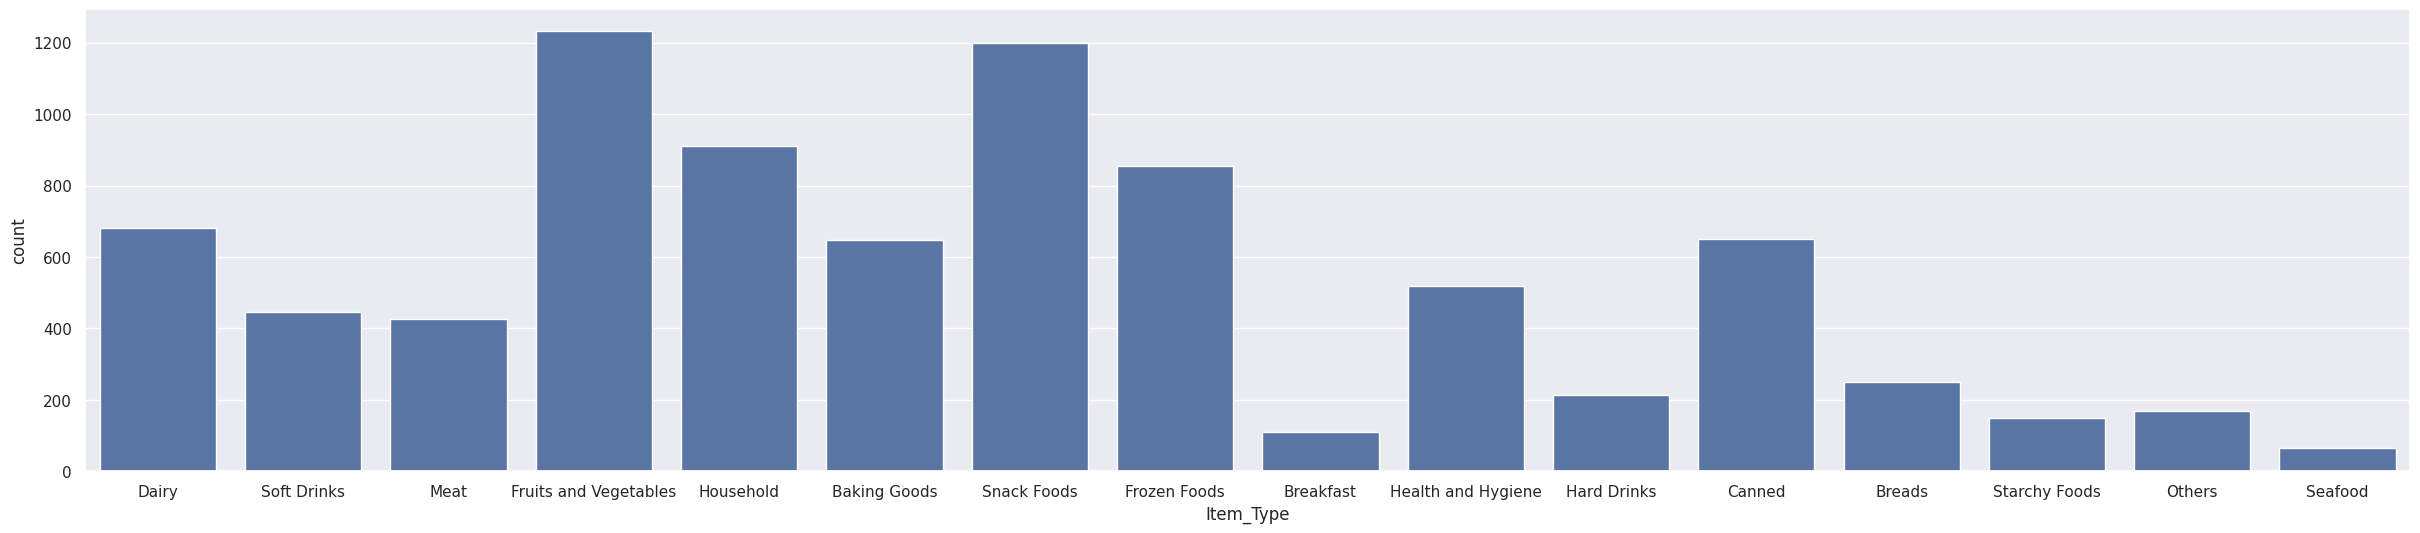

In [145]:
# Item_type distrubution
plt.figure(figsize=(30,6))
sns.countplot(x="Item_Type", data = data)
plt.show()

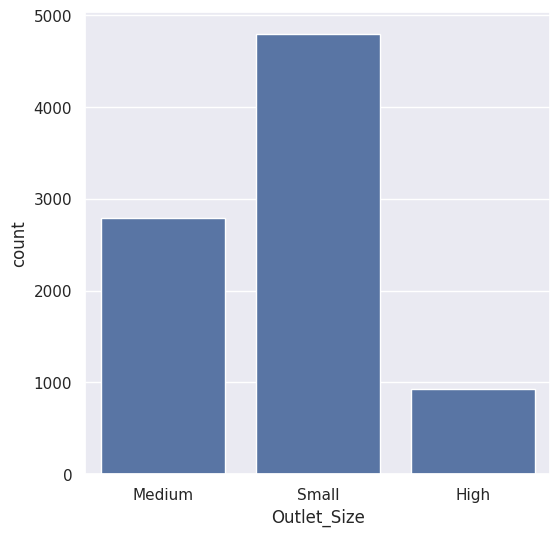

In [146]:
# outlet_size distribution
plt.figure(figsize=(6,6))
sns.countplot(x="Outlet_Size", data = data)
plt.show()

### **Data Pre Processing**

In [147]:
data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [148]:
data.replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'}, inplace=True)

In [149]:
data["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

#### Lebel Encoding

In [150]:
encoder = LabelEncoder()

In [151]:
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])

data["Item_Fat_Content"] = encoder.fit_transform(data["Item_Fat_Content"])

data["Item_Type"] = encoder.fit_transform(data["Item_Type"])

data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])

data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])

In [152]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### Splitting features and Target

In [153]:
X = data.drop(columns='Item_Outlet_Sales', axis=1)
Y = data['Item_Outlet_Sales']

In [154]:
print(X)
print(Y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

### Test train split

In [155]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [156]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (7670, 11) (853, 11)


### Model Training

In [157]:
regressor = XGBRegressor()

In [158]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluation with R square value

R square value is measures how close the original values are from the predicted values.

In [159]:
# for training data

training_data_prediction = regressor.predict(X_train)

r2_train = metrics.r2_score(Y_train, training_data_prediction)

print("R square value: ", r2_train)

R square value:  0.8593058885282375


Here,

Y_train = original value

training_data_prediction =  values predicted by out model

In [160]:
# for test data

test_data_prediction = regressor.predict(X_test)

r2_test = metrics.r2_score(Y_test, test_data_prediction)

print("R square value: ", r2_test)

R square value:  0.5556916136282035


Here,

Y_test = original value

test_data_prediction =  values predicted by out model

As we can see here the r2 value for the traning data is very high means the model is over trained. let's limit that and try again.

In [161]:
regressor = XGBRegressor(n_estimators=100, learning_rate=0.2, max_depth=3, early_stopping_rounds=10, eval_metric='rmse', eval_set=[(X_test, Y_test)], verbose=False)

In [162]:
regressor.fit(X_train, Y_train, eval_set=[(X_test, Y_test)])

[0]	validation_0-rmse:1495.96196
[1]	validation_0-rmse:1367.06252
[2]	validation_0-rmse:1272.57422
[3]	validation_0-rmse:1202.93929
[4]	validation_0-rmse:1152.63616
[5]	validation_0-rmse:1114.48053
[6]	validation_0-rmse:1090.89967
[7]	validation_0-rmse:1072.35937
[8]	validation_0-rmse:1061.12539
[9]	validation_0-rmse:1051.46980
[10]	validation_0-rmse:1045.51004
[11]	validation_0-rmse:1040.82713
[12]	validation_0-rmse:1036.88782
[13]	validation_0-rmse:1034.80610
[14]	validation_0-rmse:1033.06632
[15]	validation_0-rmse:1032.46277
[16]	validation_0-rmse:1031.97069
[17]	validation_0-rmse:1030.72312
[18]	validation_0-rmse:1029.79041
[19]	validation_0-rmse:1029.28157
[20]	validation_0-rmse:1029.24446
[21]	validation_0-rmse:1030.45069
[22]	validation_0-rmse:1031.46057
[23]	validation_0-rmse:1030.41913
[24]	validation_0-rmse:1030.09954
[25]	validation_0-rmse:1029.65525
[26]	validation_0-rmse:1030.78305
[27]	validation_0-rmse:1030.78586
[28]	validation_0-rmse:1030.82921
[29]	validation_0-rmse:1

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:27:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "eval_set", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse',
             eval_set=[(      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
7503              487    14.300000                 0         0.026300   
2957             1392     7.930000                 0         0.071136   
7031              244    14.500000                 1         0.041313   
1...
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [163]:
# for training data

training_data_prediction = regressor.predict(X_train)

r2_train = metrics.r2_score(Y_train, training_data_prediction)

print("R square value: ", r2_train)

R square value:  0.6107058764025943


In [164]:
# for test data

test_data_prediction = regressor.predict(X_test)

r2_test = metrics.r2_score(Y_test, test_data_prediction)

print("R square value: ", r2_test)

R square value:  0.6211017837760315


0.6 r2 value is good and both training and the test data have almost same r2 value.

### Use cases

In [166]:
# importing the necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming the model is already trained and imported

# Creating new data for prediction
new_data = pd.DataFrame({
    'Item_Identifier': ['FDA15', 'DRC01', 'FDN15'],
    'Item_Weight': [9.3, 5.92, 17.5],
    'Item_Fat_Content': ['Low Fat', 'Regular', 'Low Fat'],
    'Item_Visibility': [0.016047301, 0.019278216, 0.016760075],
    'Item_Type': ['Dairy', 'Soft Drinks', 'Meat'],
    'Item_MRP': [249.8092, 48.2692, 141.618],
    'Outlet_Identifier': ['OUT049', 'OUT018', 'OUT049'],
    'Outlet_Establishment_Year': [1999, 2009, 1999],
    'Outlet_Size': ['Medium', 'Medium', 'Medium'],
    'Outlet_Location_Type': ['Tier 1', 'Tier 3', 'Tier 1'],
    'Outlet_Type': ['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type1']
})

# Encoding the categorical variables
encoder = LabelEncoder()

new_data['Item_Identifier'] = encoder.fit_transform(new_data['Item_Identifier'])
new_data["Item_Fat_Content"] = encoder.fit_transform(new_data["Item_Fat_Content"])
new_data["Item_Type"] = encoder.fit_transform(new_data["Item_Type"])
new_data['Outlet_Identifier'] = encoder.fit_transform(new_data['Outlet_Identifier'])
new_data['Outlet_Location_Type'] = encoder.fit_transform(new_data['Outlet_Location_Type'])
new_data['Outlet_Type'] = encoder.fit_transform(new_data['Outlet_Type'])
new_data['Outlet_Size'] = encoder.fit_transform(new_data['Outlet_Size'])

# Predicting the sales for the new data
new_data_predictions = regressor.predict(new_data)

# Print the predictions with details
for i, prediction in enumerate(new_data_predictions):
    item_details = new_data.iloc[i]
    print(f"Item {i+1} ({item_details['Item_Type']}, {item_details['Outlet_Identifier']}): Predicted sales are {prediction:.2f}")


Item 1 (0.0, 1.0): Predicted sales are 866.07
Item 2 (2.0, 0.0): Predicted sales are 669.93
Item 3 (1.0, 1.0): Predicted sales are 358.17
